In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv("train.csv")
display(titanic.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Label Encoding

Sex değişkenini Mean encoding yaparak encode ediniz. Her kategori için Survived değişkeninin ortalamasını kategori adı ile değiştirebilirsiniz. 

IPUCU: pandas groupby ve map fonksiyonlarını kullanabilirsiniz.

In [3]:
titanic_mean = titanic.copy()

In [4]:
means = titanic_mean.Survived.groupby(titanic_mean.Sex).mean()
display(means)
titanic_mean['Sex_encoded'] = titanic_mean.Sex.map(means)
titanic_mean

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.188908
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.742038
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.742038
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.742038
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.188908
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.188908
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.742038
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.742038
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.188908


Bindikleri Yer (Embarked) değişkenini sklearn OneHotEncoder objesini kullanarak encode edin.<br>

In [5]:
titanic_ohe = titanic.copy()

In [6]:
titanic_ohe.Embarked.isna().sum()

2

In [7]:
titanic_ohe.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
titanic_ohe.Embarked.fillna(titanic_ohe["Embarked"].mode()[0],inplace=True)

In [9]:
titanic_ohe.Embarked.isna().sum()

0

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
enc = OneHotEncoder(sparse = False)
encoded_Embarked = enc.fit_transform(titanic_ohe[['Embarked']]).astype(np.uint8)
encoded_Embarked

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

Cabin değişkenini sklearn LabelEncoder veya OrdinalEncoder objesini kullanarak encode edin.

In [12]:
titanic.Cabin.head(15)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object

In [13]:
titanic.Cabin.describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [14]:
titanic.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
D              3
              ..
D9             1
E34            1
T              1
D30            1
E31            1
Name: Cabin, Length: 147, dtype: int64

In [15]:
titanic_lbl = titanic.copy()

In [16]:
titanic_lbl.Cabin.fillna("Na",inplace=True)

In [17]:
titanic_lbl.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
titanic_lbl['Cabin_enc'] = enc.fit_transform(titanic_lbl.Cabin)
titanic_lbl

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_enc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Na,S,146
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,81
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Na,S,146
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,55
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Na,S,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Na,S,146
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,30
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,Na,S,146
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,60


# Outlier Handling

Fare değişkeni için boxplot çizdiriniz.

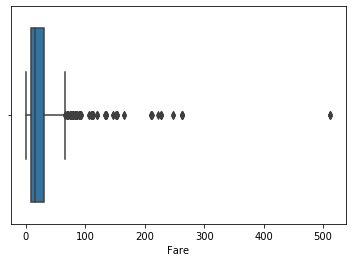

In [19]:
sns.boxplot(x = titanic.Fare)

Fare değişkeninedeki outlier değerleri Z-Score kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız. 

In [20]:
z_score = (titanic.Fare - titanic.Fare.mean()) / titanic.Fare.std()
z_score

0     -0.502163
1      0.786404
2     -0.488580
3      0.420494
4     -0.486064
         ...   
886   -0.386454
887   -0.044356
888   -0.176164
889   -0.044356
890   -0.492101
Name: Fare, Length: 891, dtype: float64

In [21]:
(z_score>3).sum(), (z_score<-3).sum()

(20, 0)

NOT: Bu kod satırı bana 20 tane 3 ten büyük olan outlier değerim olduğunu buna karşın -3 ten küçük olan outlier değerimin olmadığını anlatmaktadır.

In [22]:
(z_score>3).sum() + (z_score<-3).sum()

20

In [23]:
upper = titanic[z_score<=3].Fare.max()
lower = titanic[z_score>=-3].Fare.min()
upper, lower

(164.8667, 0.0)

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [24]:
titanic_zscore_replaced = titanic.copy()
titanic_zscore_replaced["Fare"][z_score>3] = upper
titanic_zscore_replaced.head(30)

C:\Users\salih\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


NOT : 27 index numaralı satırda Fare kolonunda veriyi upper noktaya(164.8667) çektiğimizi görürken z_score u -3 ten küçük hiçbir kategorimiz olmadığı için lower noktasına(0) çekme işlemini uygulamadım. 

Fare değişkeninedeki outlier değerleri IQR metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [25]:
q1 = titanic.Fare.quantile(q=0.25)
q3 = titanic.Fare.quantile(q=0.75)

In [26]:
iqr = q3-q1
iqr

23.0896

In [27]:
from scipy import stats
iqr = stats.iqr(titanic.Fare)
iqr

23.0896

In [28]:
upper_limit = q3 +1.5*iqr
lower_limit = q1 -1.5*iqr
lower_limit, upper_limit

(-26.724, 65.6344)

In [29]:
len(titanic.Fare[(titanic.Fare > upper_limit) | (titanic.Fare < lower_limit)])

116

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [30]:
titanic_iqr_replaced = titanic.copy()
titanic_iqr_replaced["Fare"][titanic["Fare"] > upper_limit] = upper_limit
titanic_iqr_replaced["Fare"][titanic["Fare"] < lower_limit] = lower_limit
titanic_iqr_replaced.head()

C:\Users\salih\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\salih\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


NOT: 1.indexte Fare kolonunun değeri upper_limit seviyesine(65.6344)'e çekilmiştir.

Fare değişkeninedeki outlier değerleri Hard-Edges metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [31]:
lower_limit = titanic.Fare.quantile(q=0.01)
upper_limit = titanic.Fare.quantile(q=0.99)
lower_limit, upper_limit

(0.0, 249.00622000000033)

In [32]:
len(titanic.Fare[(titanic.Fare > upper_limit) | (titanic.Fare < lower_limit)])

9

In [33]:
len(titanic.Fare[(titanic.Fare > upper_limit)])

9

NOT: üst limiti aşan outlier değerlerim varken alt limiti aşan bir değerim bulunmamaktadır.

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [34]:
titanic_he_replaced = titanic.copy()
titanic_he_replaced["Fare"][titanic["Fare"] > upper_limit] = upper_limit
titanic_he_replaced["Fare"][titanic["Fare"] < lower_limit] = lower_limit
titanic_he_replaced.head(30)

C:\Users\salih\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\salih\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28330,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05000,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.45830,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.86250,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.07500,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.13330,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.07080,NaN,C


Fare değişkeni için yukarıdaki 3 metodu kullanarak sınır değerler olarak bulduğunuz değerleri ve outlier sayılarını karşılaştırın. Bu değişken için hangisini kullanmak daha mantıklı olabilir?

Z-score metodunu uyguladığımızda 20 outlier, IQR metodunda 116 outlier ve Hard-Edges metodunda 9 outlier elde ettik. Bu değişken için Hard-Edges metodunu kullanmak daha mantıklı duruyor çünkü genel olarak verilerimizin outlier olması pek de istediğimiz bir yöntem değildir.